# Import Packages

In [2]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle

# Load dataset


In [3]:
train = pd.read_csv('train.csv')
with open('cleaned_df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,2,2008,WD,Normal
1,20,RL,80.0,9600,0,NoAlley,Reg,Lvl,AllPub,FR2,...,0,0,NoPool,NoFen,NoMF,0,5,2007,WD,Normal
2,60,RL,68.0,11250,0,NoAlley,IR1,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,9,2008,WD,Normal
3,70,RL,60.0,9550,0,NoAlley,IR1,Lvl,AllPub,Corner,...,0,0,NoPool,NoFen,NoMF,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,0,NoAlley,IR1,Lvl,AllPub,FR2,...,0,0,NoPool,NoFen,NoMF,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,MnPrv,NoMF,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,4,2010,WD,Normal


# Separate into Continuous and categorical

In [140]:
#create x and y
X = df
y = train.SalePrice

#identify continuous and categorical X variables
# no'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold', or'YrSold',  
#identify all continuous X variables
continuous_X = X[['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', 
                  '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 
                  'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 
                  'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                  'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                  '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']]

continuous_Xa = X[['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', 
                  '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 
                  'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 
                  'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                  'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                  '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 
                   'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 
                   'YearRemodAdd', 'GarageYrBlt','MoSold', 'YrSold']]
#identify all categorical X variables
all_categorical_X = []
for variable in X.columns:
    if variable not in continuous_X:
        all_categorical_X.append(variable)
    else:
        continue
categorical_X = X[all_categorical_X]

#binary categorical variables are 'Street','CentralAir'

In [100]:
continuous_X

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,1,2,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,2,2,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,2,1,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,0,1,240,366,0,112,0,0,0,0


# Check The assumptions of linear regression


## Checking linearity

First, multiple linear regression requires the relationship between the independent and dependent variables to be linear.  The linearity assumption can best be tested with scatterplots.

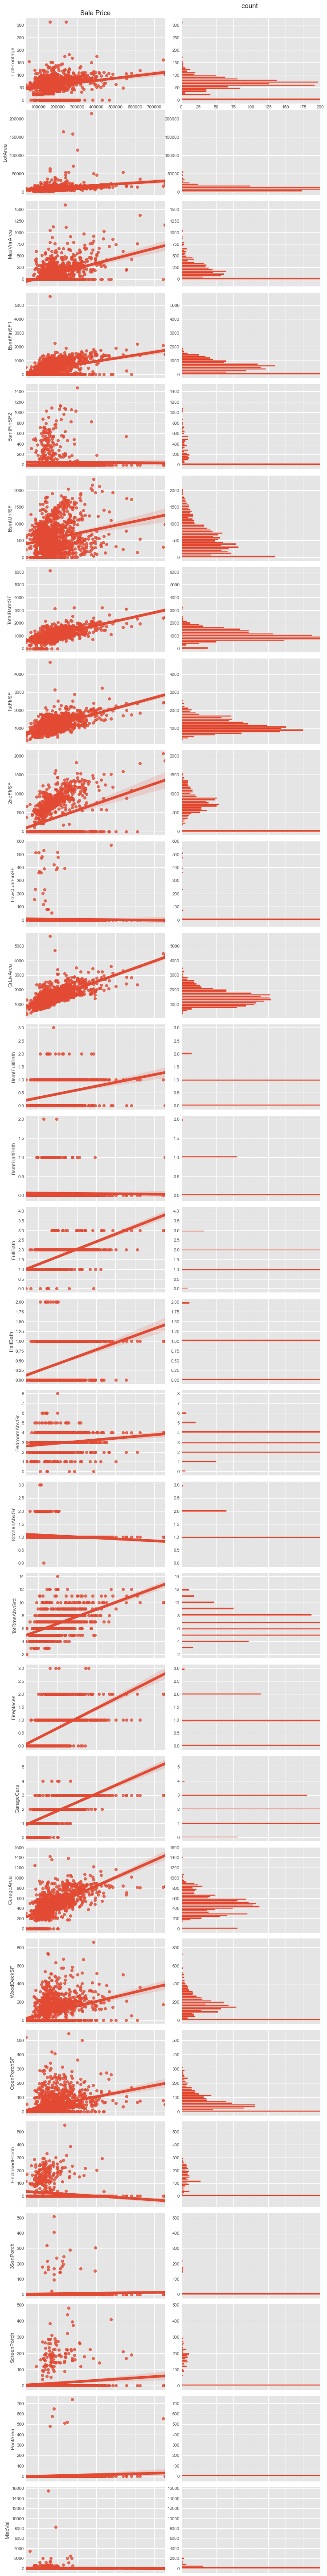

In [150]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 80))
gs = gridspec.GridSpec(28, 2)

for i in range(28):
    ax1 = plt.subplot(gs[i, 0])
    ax2 = plt.subplot(gs[i, 1])    
    sns.regplot(y, continuous_X.iloc[:, i], ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
    continuous_X[continuous_X.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal')    
    ax2.set_ylim((ylim[0], ylim[1]))
    ax2.set_xlabel('')
    ax2.set_xlim((0, 200))
    for tick in ax2.yaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
    if i != 0:
        ax1.set_xticklabels([''])
        ax2.set_xticklabels([''])
    else:
        ax1.set_title('Sale Price', size=15)
        ax2.set_title('count \n', size=15)
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
        for tick in ax2.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

# Checking Homoscedasticity ( Constant Variance )

This assumption states that the variance of error terms are similar across the values of all the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables

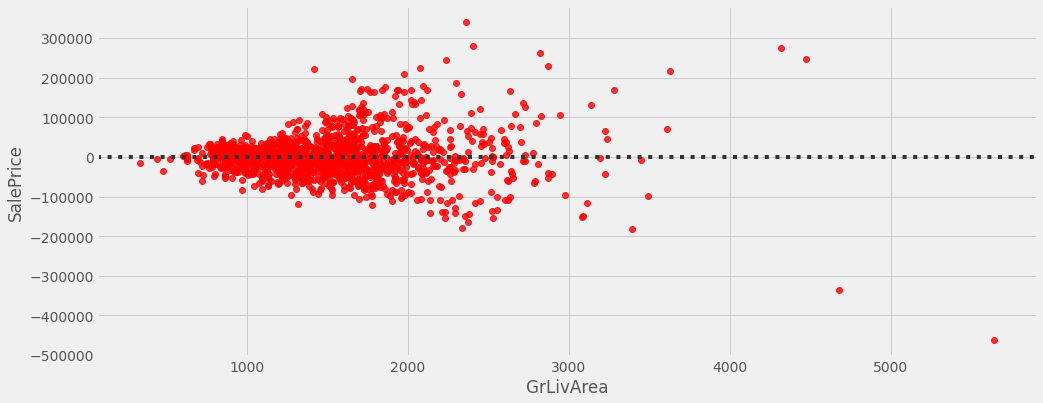

In [74]:
## Customizing grid for two plots. 
fig, ax1 = plt.subplots(figsize = (15,6))
## doing the first scatter plot. 
sns.residplot(x = train.GrLivArea, y = train.SalePrice, color = 'red')
## doing the scatter plot for GrLivArea and SalePrice. 
plt.style.use("fivethirtyeight")

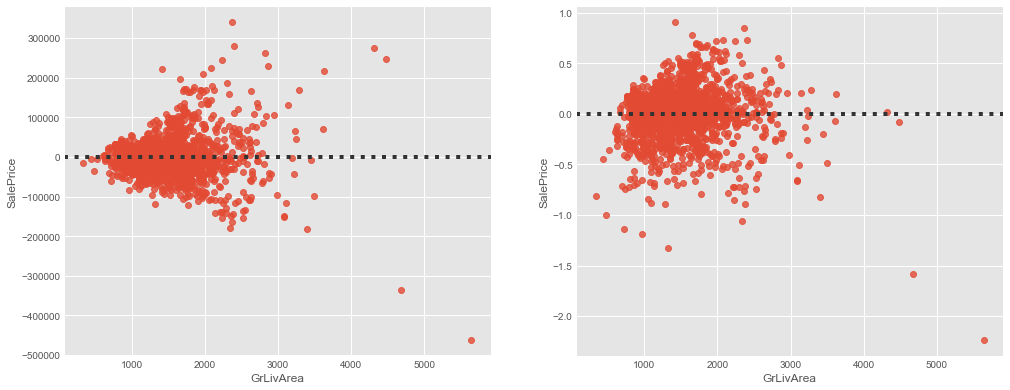

In [151]:
fig, (ax1, ax2) = plt.subplots(figsize = (15,6), 
                               ncols=2, 
                               sharey = False, 
                               sharex=False
                              )
## doing the first scatter plot. 
sns.residplot(x = train["GrLivArea"], y = train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.residplot(x = train["GrLivArea"], y = np.log1p(train["SalePrice"]), ax = ax2);


# Independence of Errors ( vs Autocorrelation )

Linear regression analysis requires that there is little or no autocorrelation in the data.  Autocorrelation occurs when the residuals are not independent from each other.  In other words when the value of y(x+1) is not independent from the value of y(x).



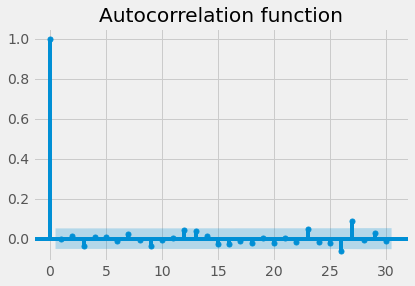

In [95]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(train.SalePrice, lags=30, title='Autocorrelation function')
plt.show()

# Multivariate Normality ( Normality of Errors )

Multiple linear regression analysis requires that the errors between observed and predicted values (i.e., the residuals of the regression) should be normally distributed. This assumption may be checked by looking at a histogram or a Q-Q-Plot.  Normality can also be checked with a goodness of fit test (e.g., the Kolmogorov-Smirnov test), though this test must be conducted on the residuals themselves.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

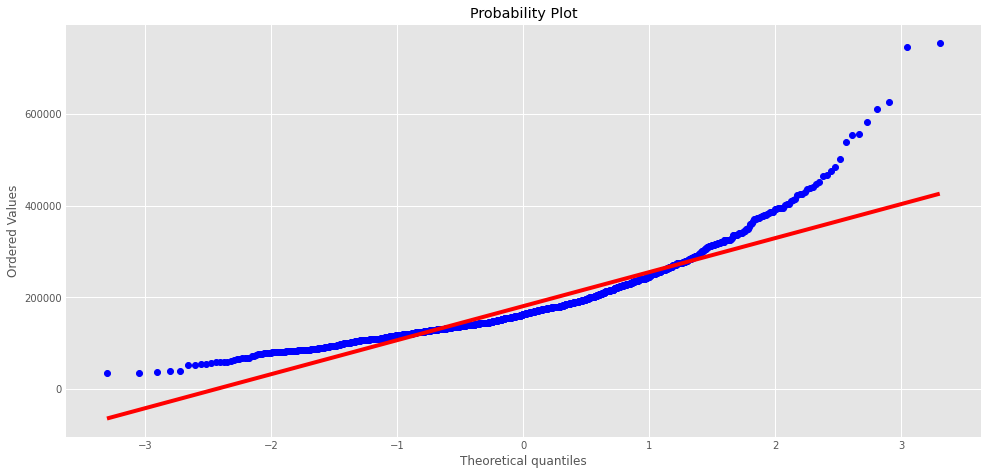

In [61]:
fig = plt.figure(constrained_layout=True, figsize=(20,18))
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
# customizing the QQ_plot. 
ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('QQ_plot')
## Plotting the QQ_Plot. 
stats.probplot(train.loc[:,"SalePrice"], plot = ax2)

# No or little Multicollinearity.
 Multicollinearity occurs when the independent variables are too highly correlated with each other.



In [108]:
list(continuous_X.columns) + ["SalePrice"]

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

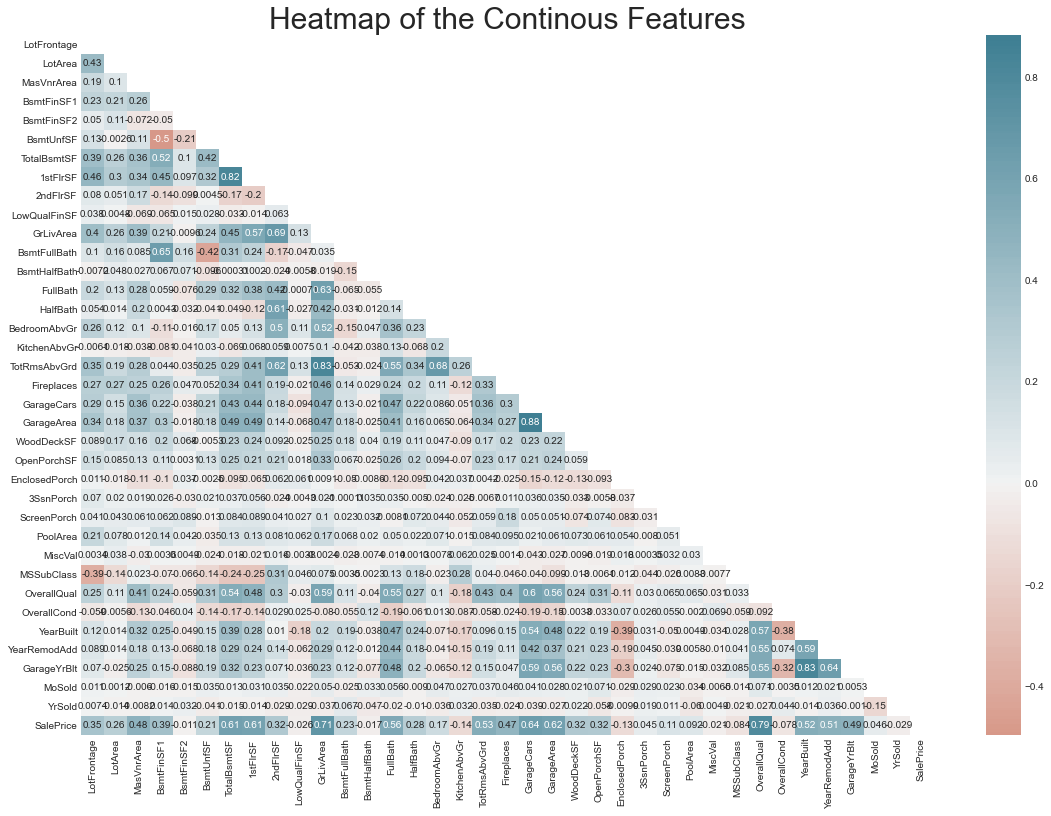

In [147]:
temp = train[list(continuous_Xa.columns) + ["SalePrice"]].corr()
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (17,12))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(temp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(temp, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0,
           );
## Give title. 
plt.title("Heatmap of the Continous Features", fontsize = 30);

* There is 0.83 or 83% correlation between GarageYrBlt and YearBuilt.
* 83% correlation between TotRmsAbvGrd and GrLivArea.
* 89% correlation between GarageCars and GarageArea.
* 83% correlation between 1stFlrSF and TotalBsmtSF
* Similarly many other features such as BsmtUnfSF, FullBath have good correlation with other independent feature.


### Visualization of Sale Price

<AxesSubplot:title={'center':'Histogram'}, xlabel='SalePrice', ylabel='Density'>

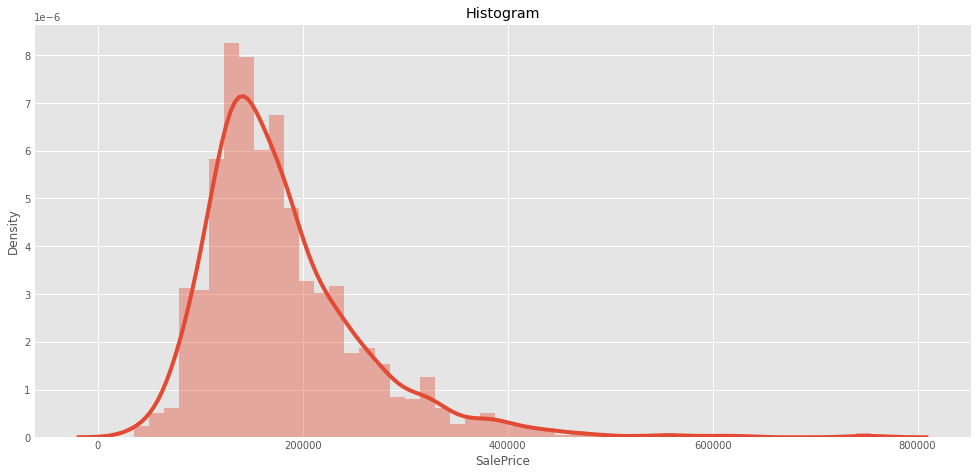

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('ggplot')


fig = plt.figure(constrained_layout=True, figsize=(20,18))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Histogram')
## plot the histogram. 
sns.distplot(train.loc[:,"SalePrice"], norm_hist=True, ax = ax1)


<AxesSubplot:title={'center':'Box Plot'}, xlabel='SalePrice'>

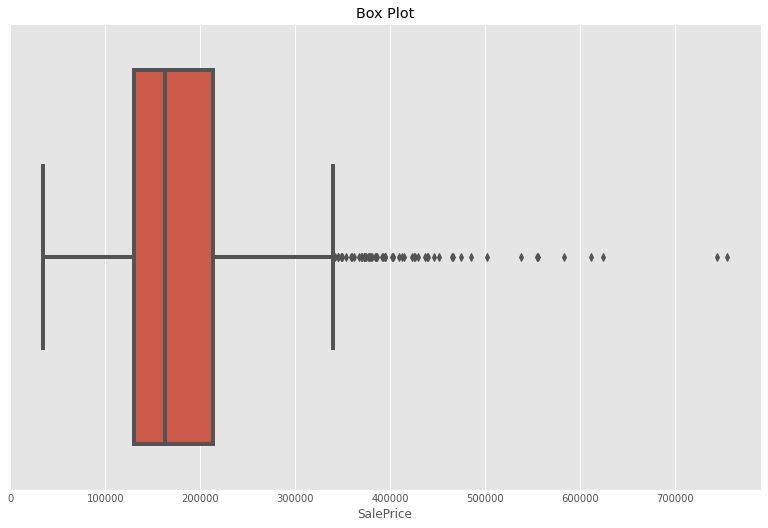

In [62]:
fig = plt.figure(figsize=(12,8))
## Customizing the Box Plot. 
ax3 = fig.add_subplot()
## Set title. 
ax3.set_title('Box Plot')
## Plotting the box plot. 
sns.boxplot(train.loc[:,"SalePrice"],  orient='v', ax = ax3 )

In [64]:
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))


Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


# Log Transformed 

<AxesSubplot:title={'center':'Histogram'}, xlabel='SalePrice', ylabel='Density'>

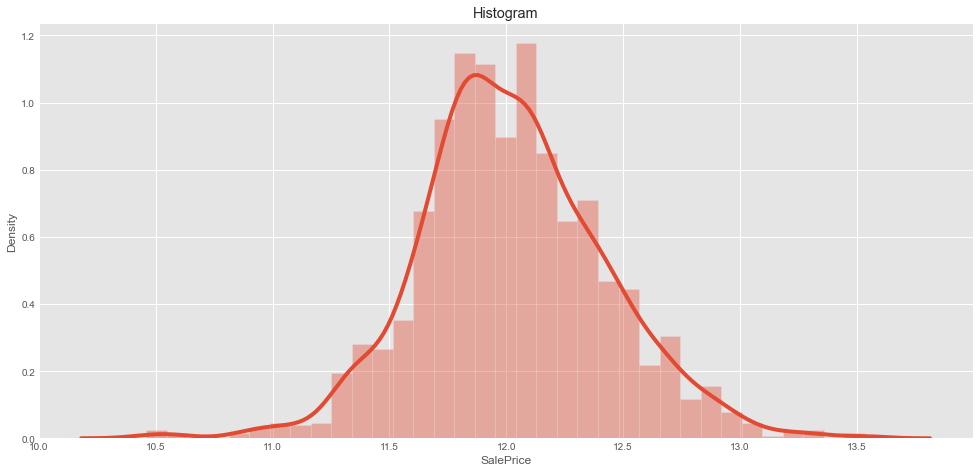

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('ggplot')


fig = plt.figure(constrained_layout=True, figsize=(20,18))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Histogram')
## plot the histogram. 
sns.distplot(np.log1p(train["SalePrice"]), norm_hist=True, ax = ax1)


In [111]:
print("Skewness: " + str(np.log1p(train["SalePrice"]).skew()))
print("Kurtosis: " + str(np.log1p(train["SalePrice"]).kurt()))

Skewness: 0.12134661989685329
Kurtosis: 0.809519155707878


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826703))

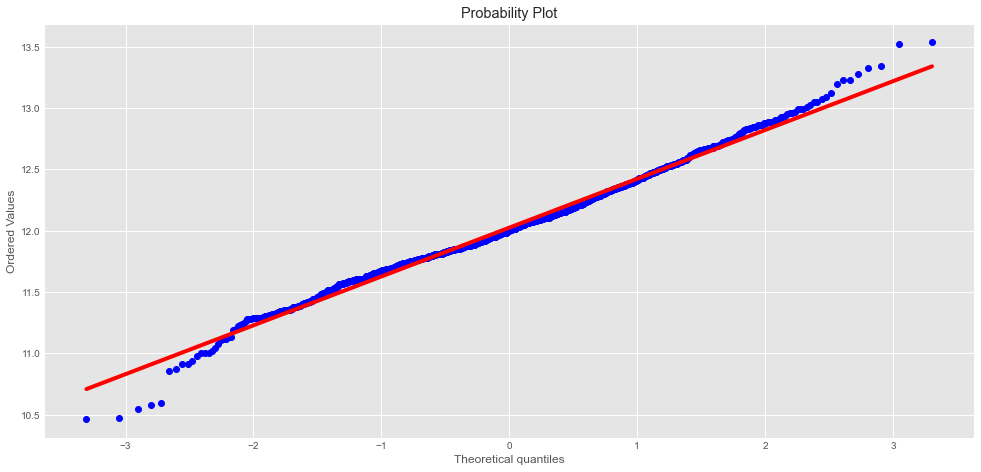

In [113]:
fig = plt.figure(constrained_layout=True, figsize=(20,18))
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
# customizing the QQ_plot. 
ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('QQ_plot')
## Plotting the QQ_Plot. 
stats.probplot(np.log1p(train["SalePrice"]), plot = ax2)

<AxesSubplot:title={'center':'Box Plot'}, xlabel='SalePrice'>

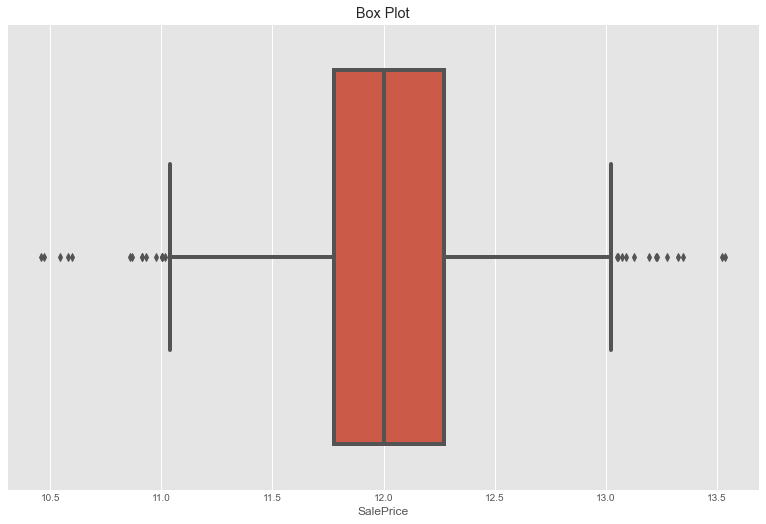

In [114]:
fig = plt.figure(figsize=(12,8))
## Customizing the Box Plot. 
ax3 = fig.add_subplot()
## Set title. 
ax3.set_title('Box Plot')
## Plotting the box plot. 
sns.boxplot(np.log1p(train["SalePrice"]),  orient='v', ax = ax3 )

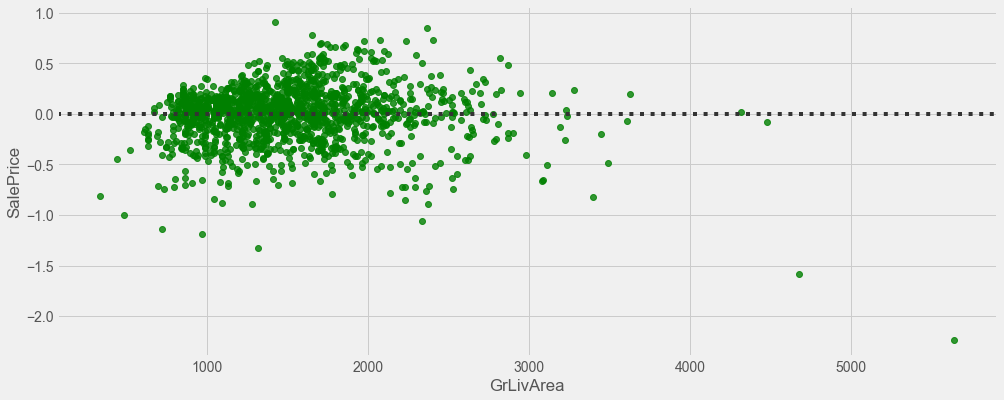

In [120]:
## Customizing grid for two plots. 
fig, ax1 = plt.subplots(figsize = (15,6), 
                              )
## doing the first scatter plot. 
sns.residplot(x = train.GrLivArea, y = np.log1p(train["SalePrice"]), color = 'green')
## doing the scatter plot for GrLivArea and SalePrice. 
plt.style.use("fivethirtyeight")

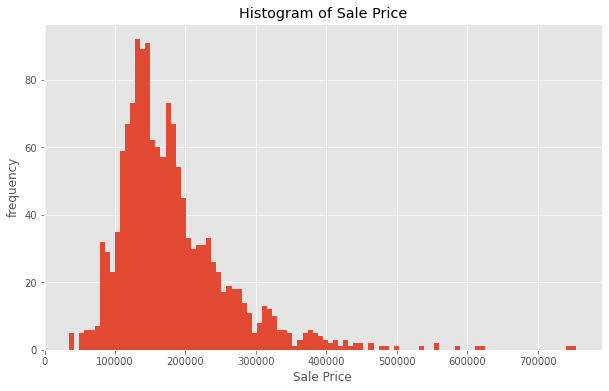

In [6]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('Sale Price',)
plt.title('Histogram of Sale Price')
y.hist(bins=100)
plt.show()

# check how many NAs in Train Data

In [63]:
total = train.isnull().sum().sort_values(ascending = False)[train.isnull().sum().sort_values(ascending = False) != 0]
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])



,Total_missing,Percent_wise
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


Text(0.5, 0, 'Number of Missing Values')

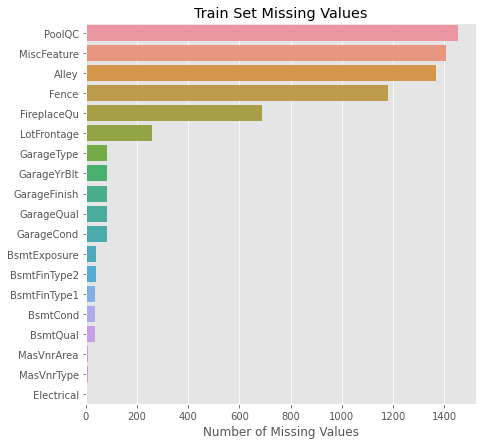

In [11]:
na_counts = train.isnull().sum()
na_counts = na_counts[na_counts != 0]
na_counts = na_counts.sort_values(ascending=False)
plt.rcParams["figure.figsize"] = (7,7)
sns.barplot(x=na_counts,y=na_counts.index, orient='h').set_title('Train Set Missing Values')
plt.xlabel('Number of Missing Values')

# Summarize all variables

In [4]:
continuous_X.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [5]:
for column in categorical_X.columns:
    print(categorical_X[column].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
0    1454
1       6
Name: Street, dtype: int64
NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitch

# Visualization of Sale price for binary categorical variables


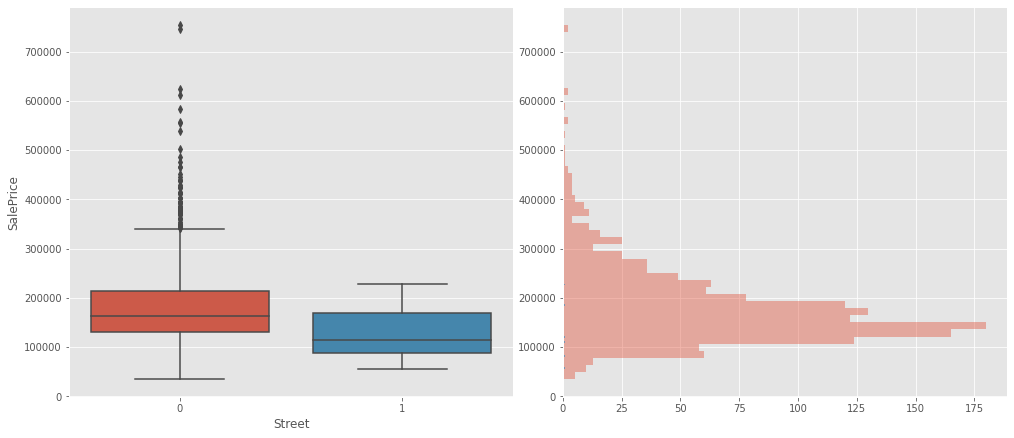

In [7]:
import matplotlib.gridspec as gridspec
import seaborn as sns

Street_Pave = y[X.Street == 0]
Street_Grvl = y[X.Street == 1]
# CentralAir_Y = y[X.CentralAir == 'Y']
# CentralAir_N = y[X.CentralAir == 'N']

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(y=y, x=X.Street, ax=ax1)
ylim = ax1.get_ylim()
hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
Street_Pave.hist(alpha=0.4, **hist_kwargs)
Street_Grvl.hist(alpha=0.6, **hist_kwargs)
ax2.set_ylim((ylim[0], ylim[1]))
for tick in ax2.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = False
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
plt.show()

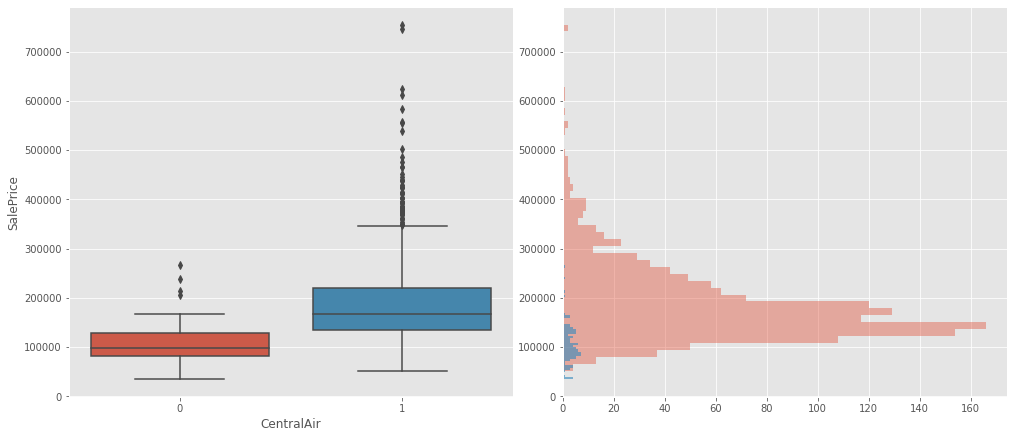

In [8]:
CentralAir_Y = y[X.CentralAir == 1]
CentralAir_N = y[X.CentralAir == 0]

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(y=y, x=X.CentralAir, ax=ax1)
ylim = ax1.get_ylim()
hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
CentralAir_Y.hist(alpha=0.4, **hist_kwargs)
CentralAir_N.hist(alpha=0.6, **hist_kwargs)
ax2.set_ylim((ylim[0], ylim[1]))
for tick in ax2.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = False
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
plt.show()

# Visualization of Sale price for Non-binary categorical variables


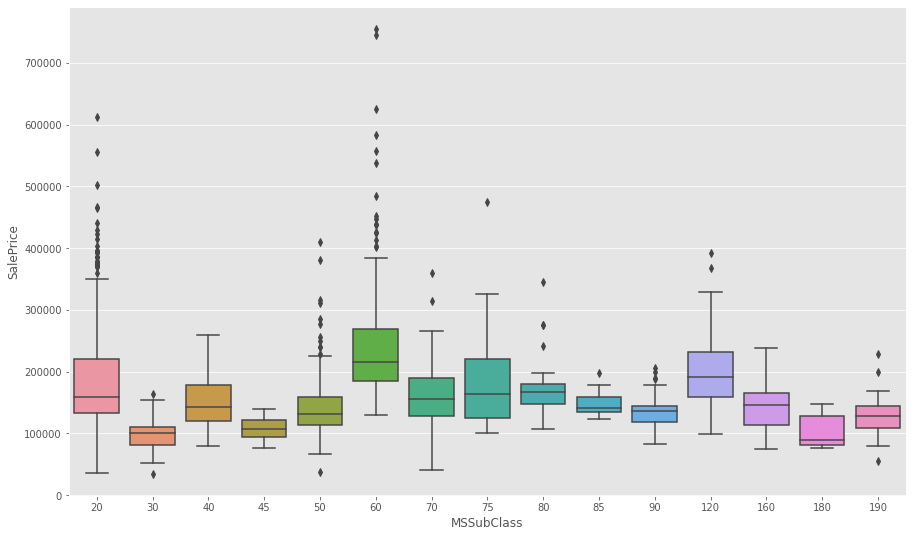

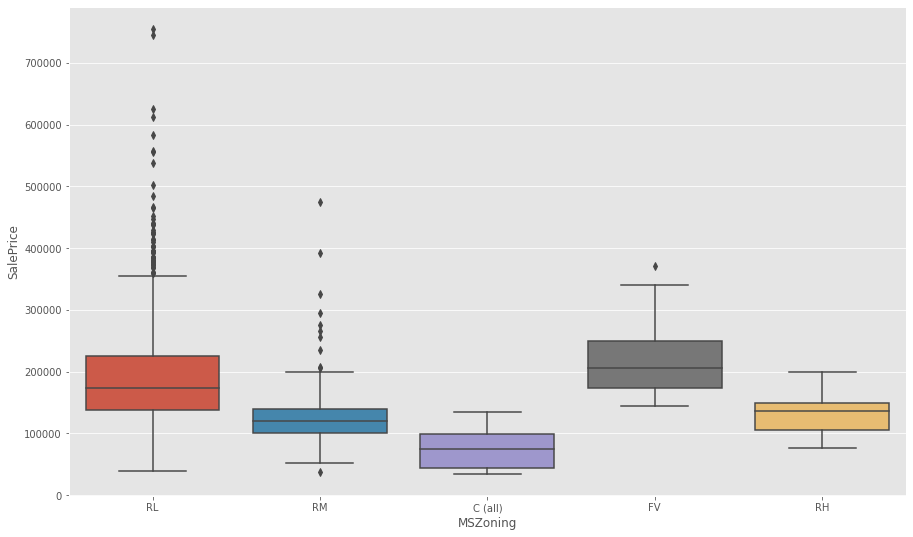

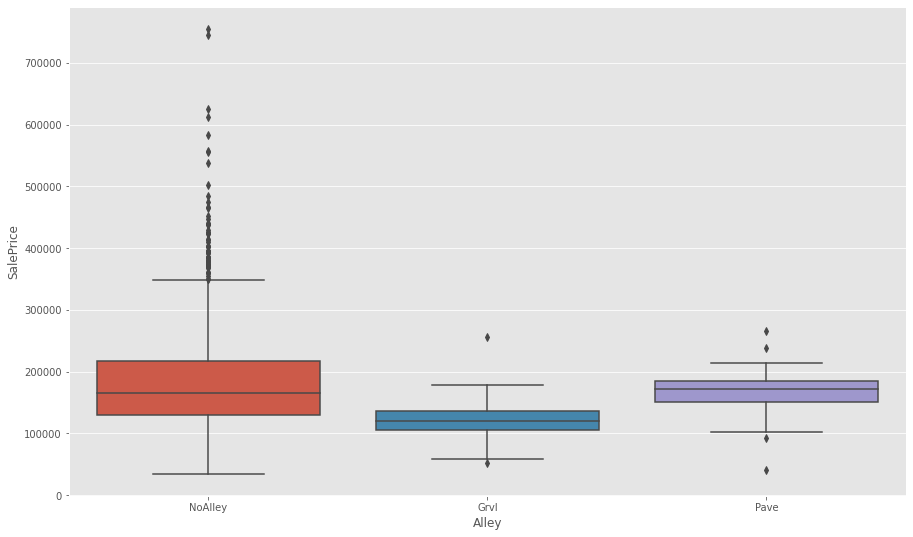

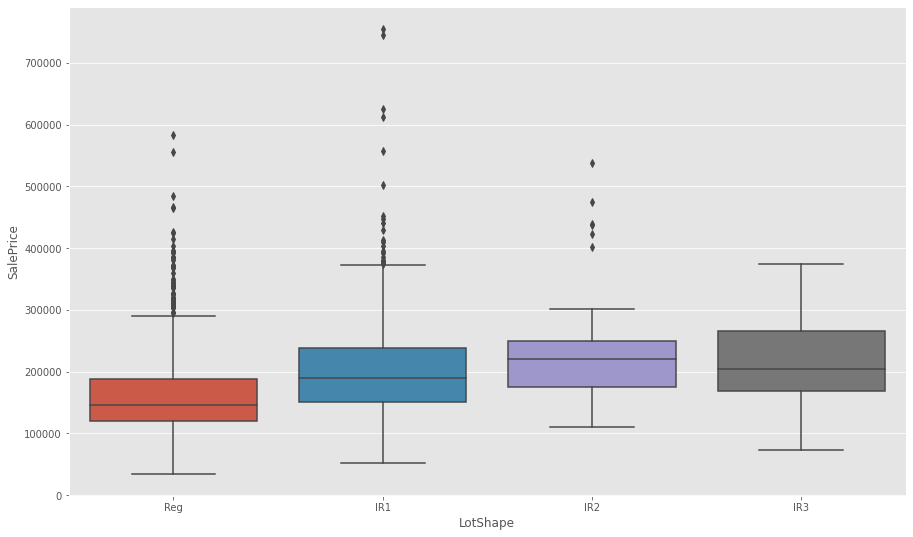

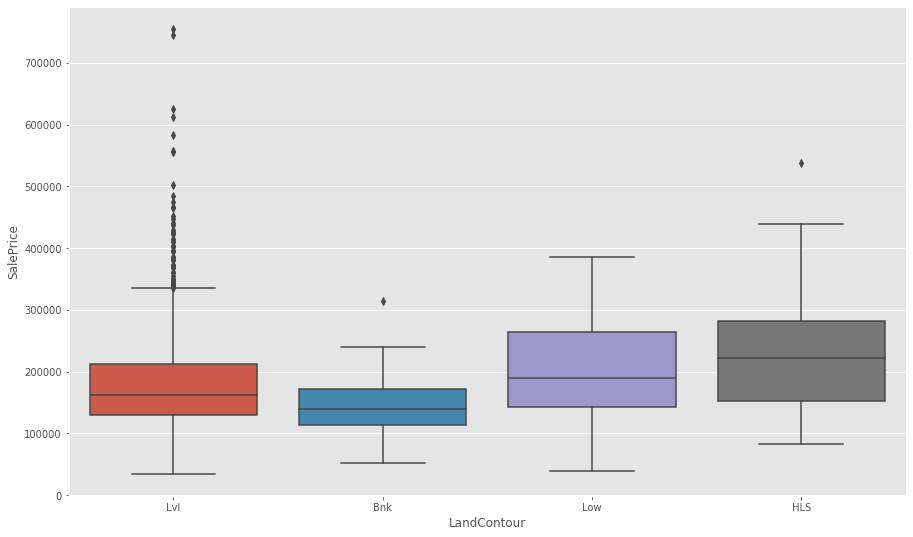

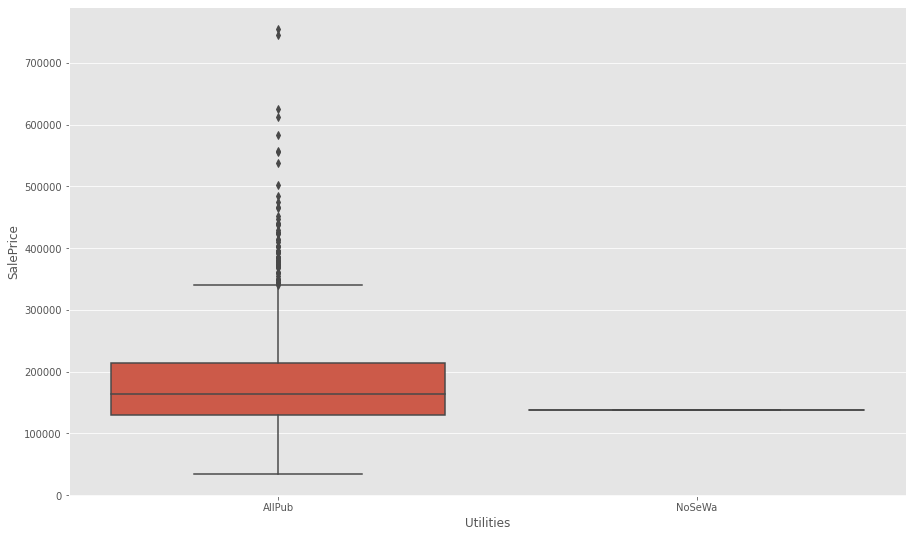

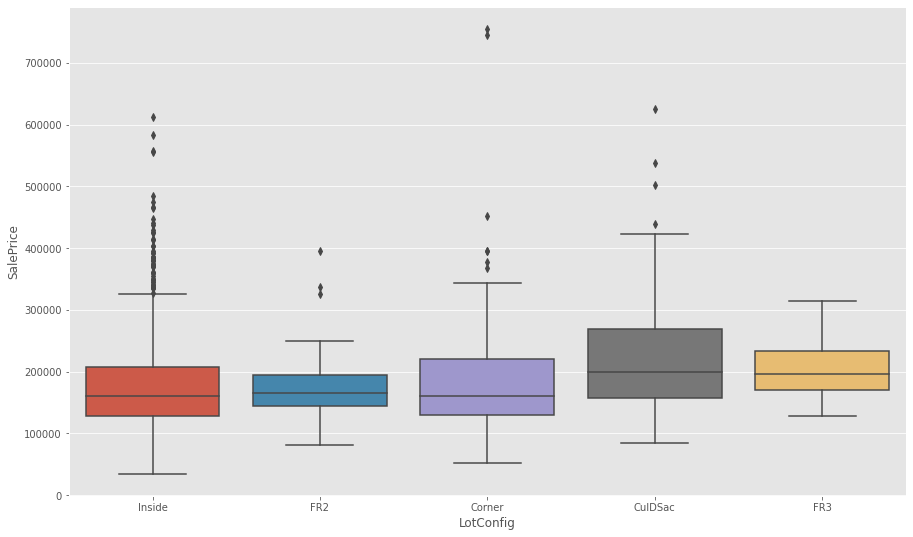

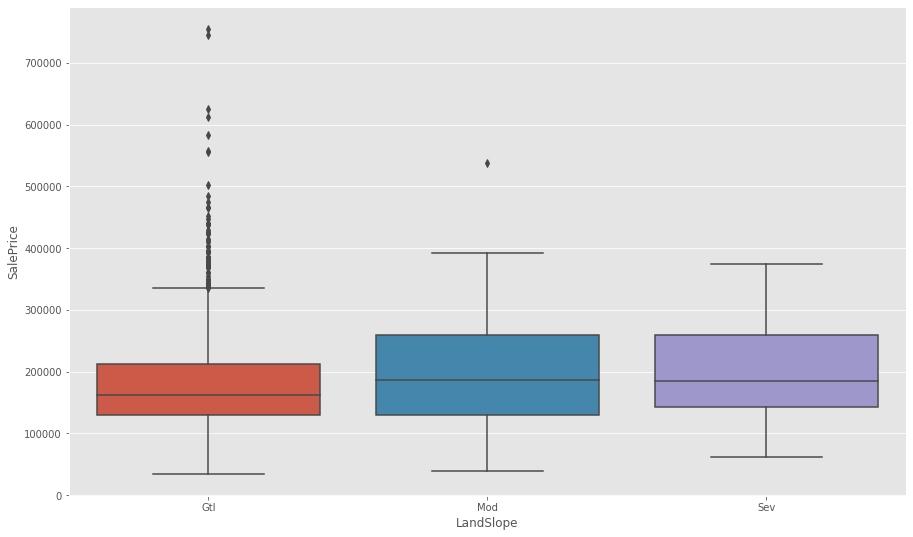

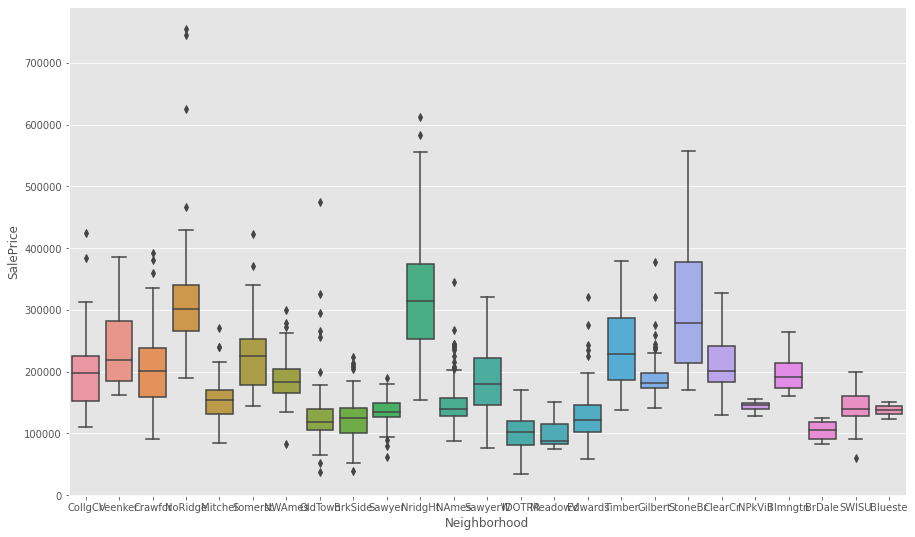

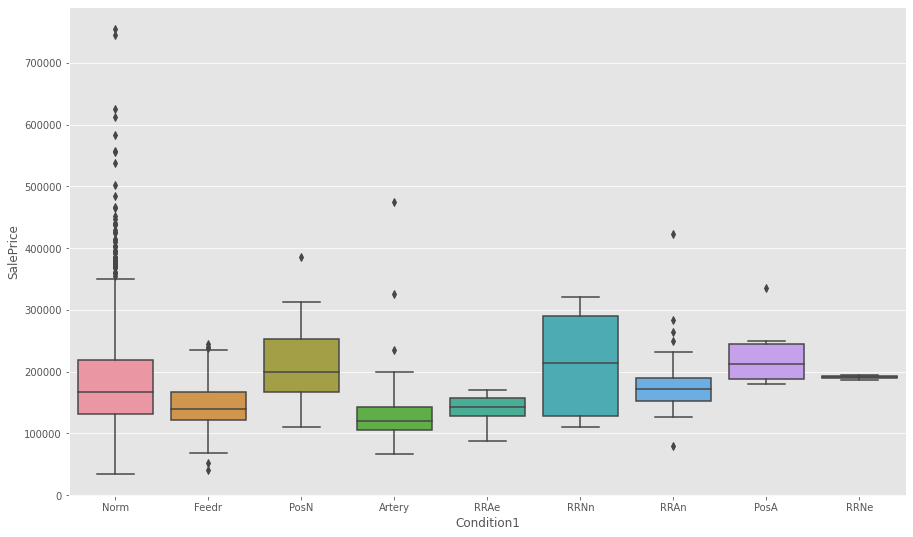

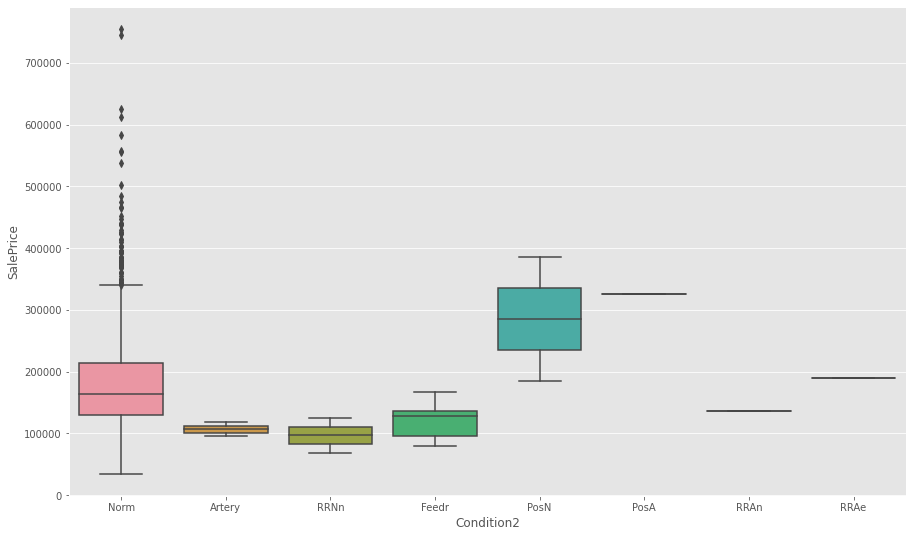

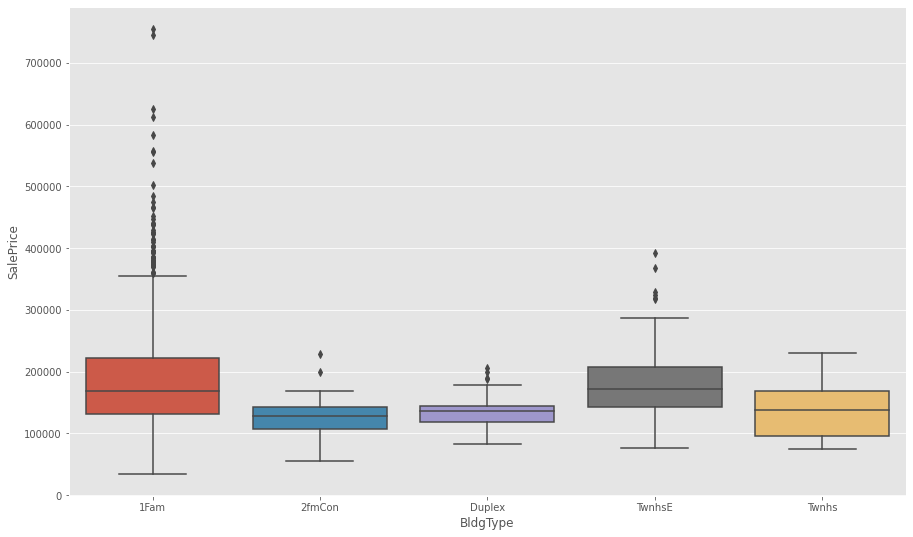

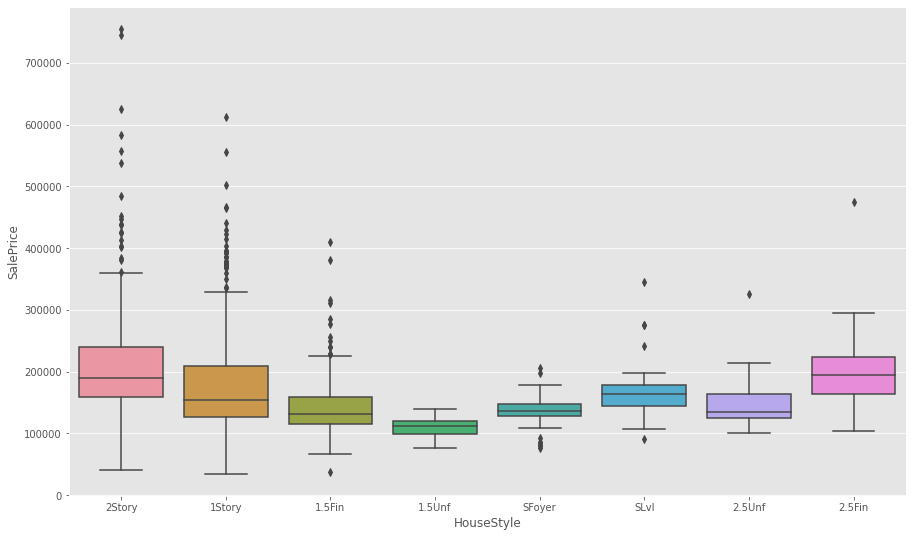

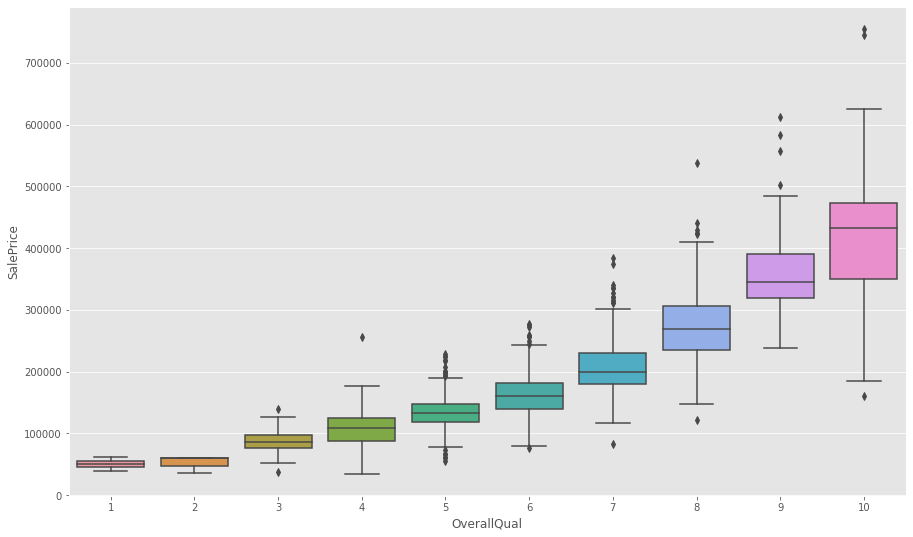

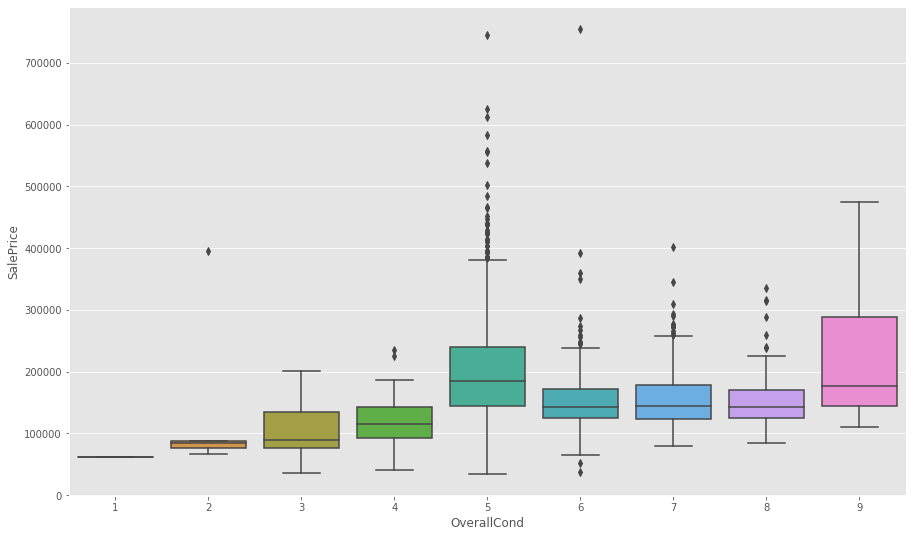

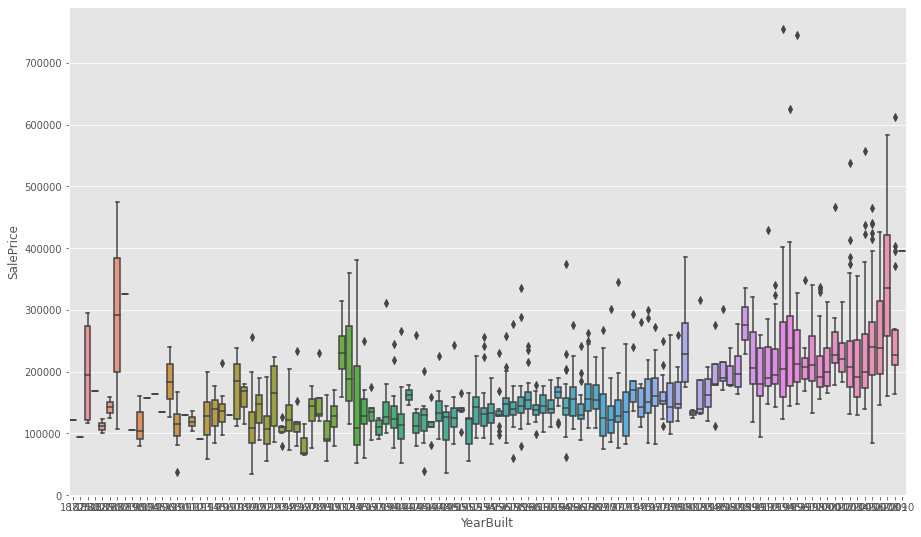

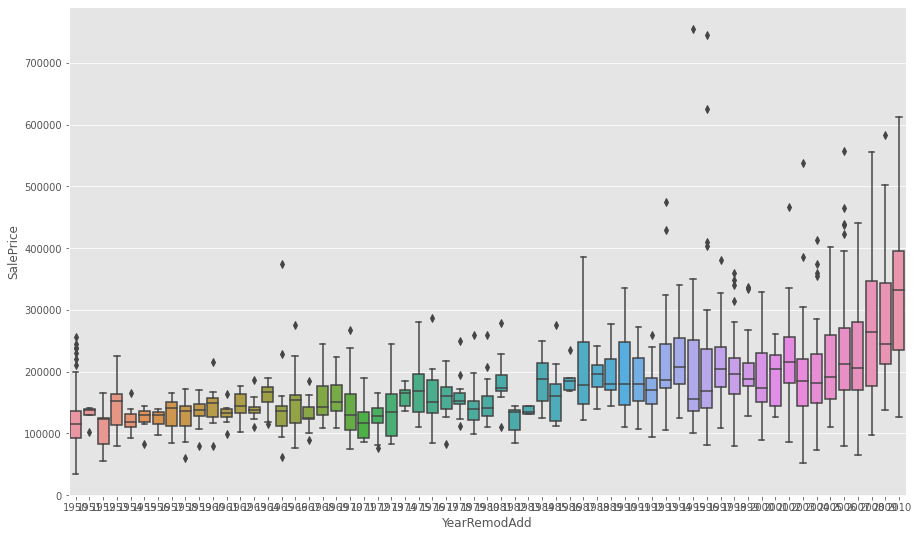

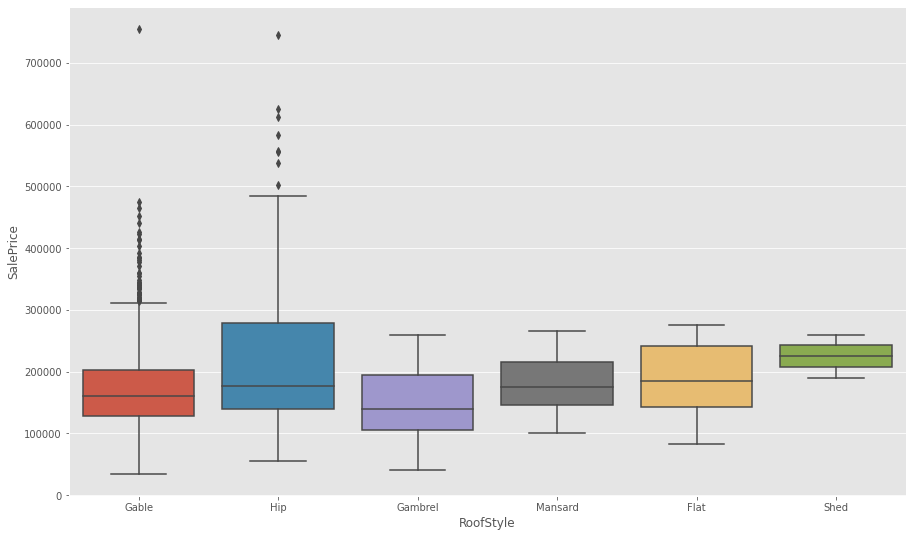

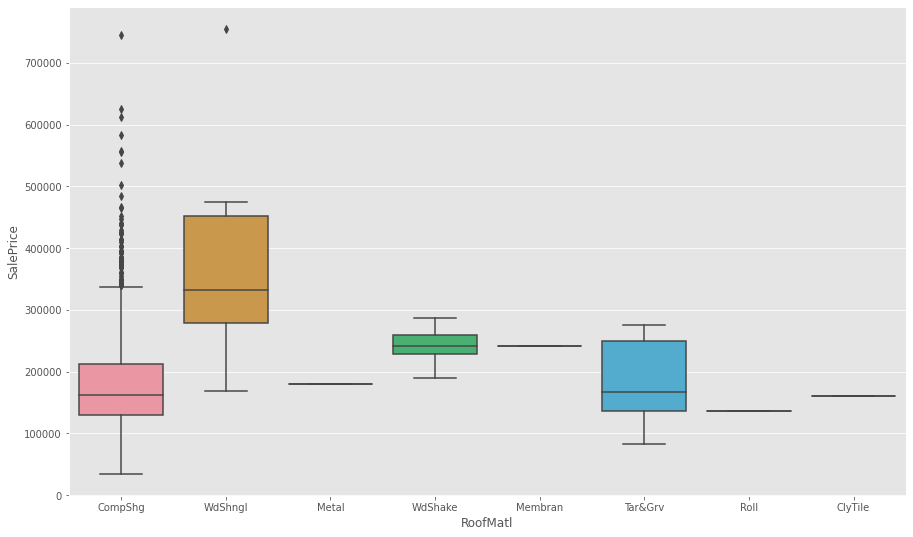

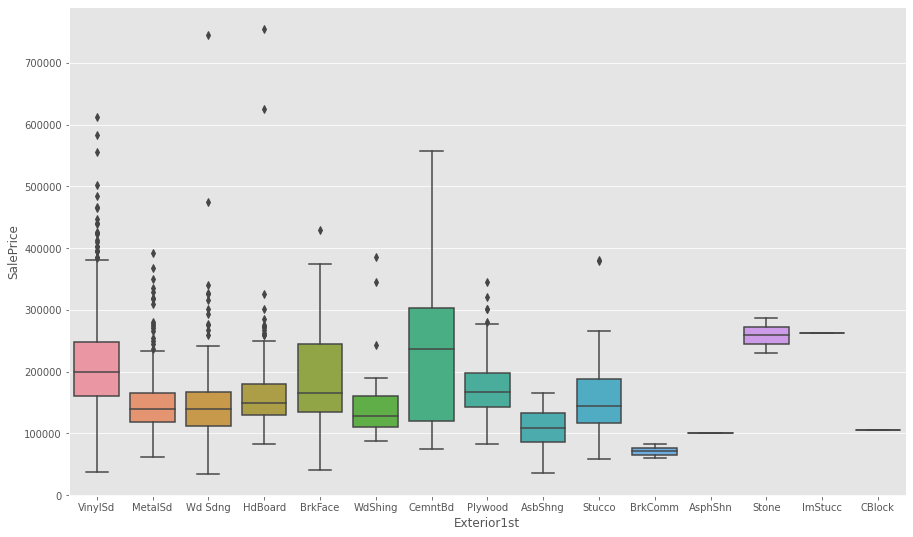

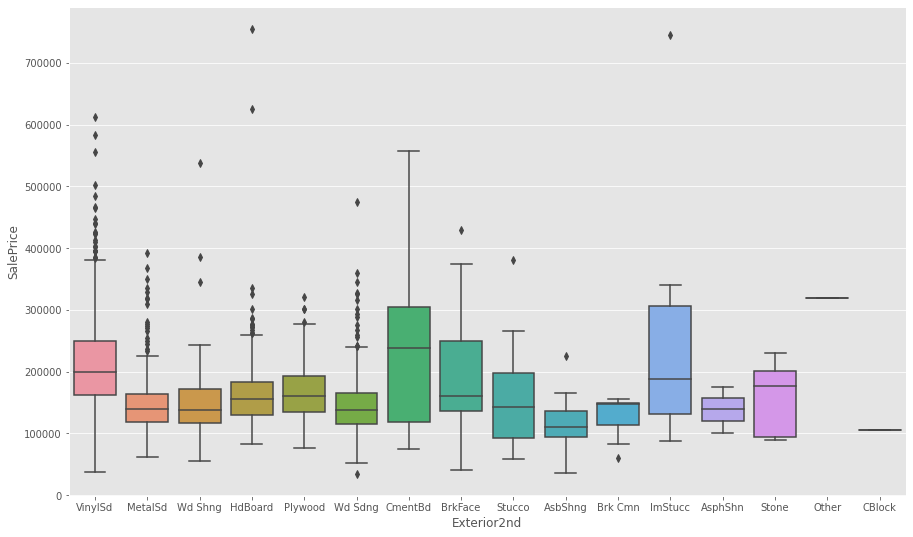

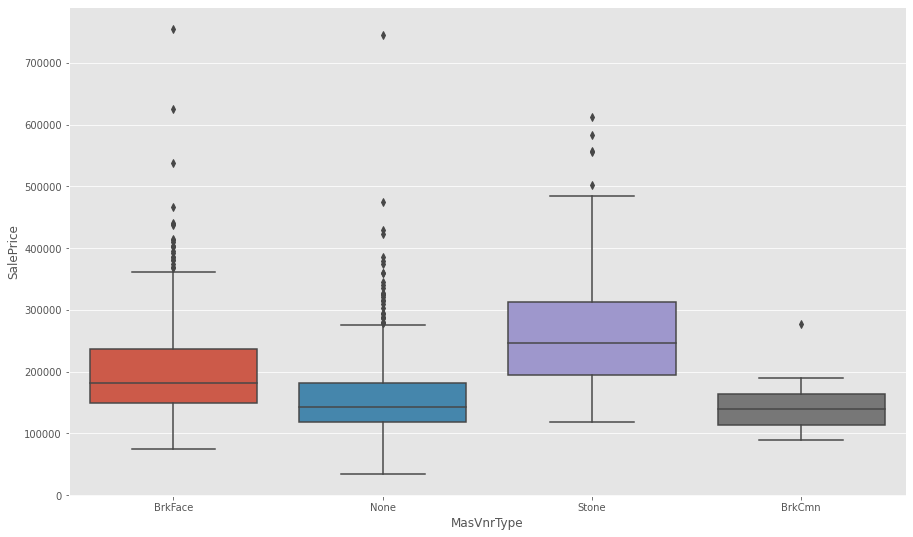

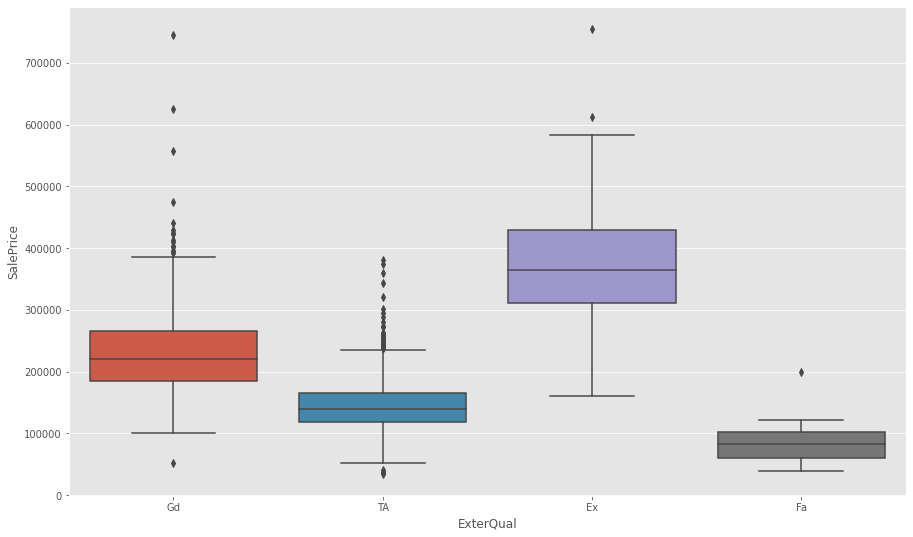

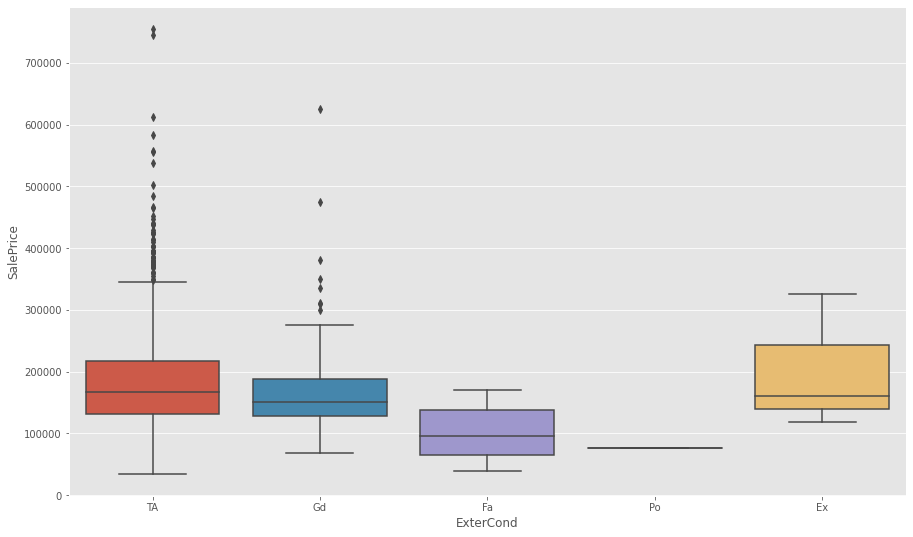

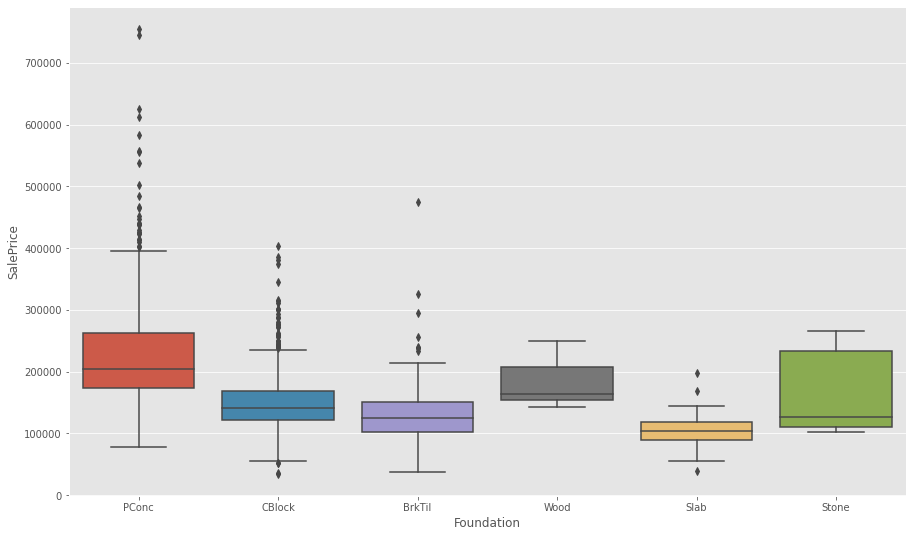

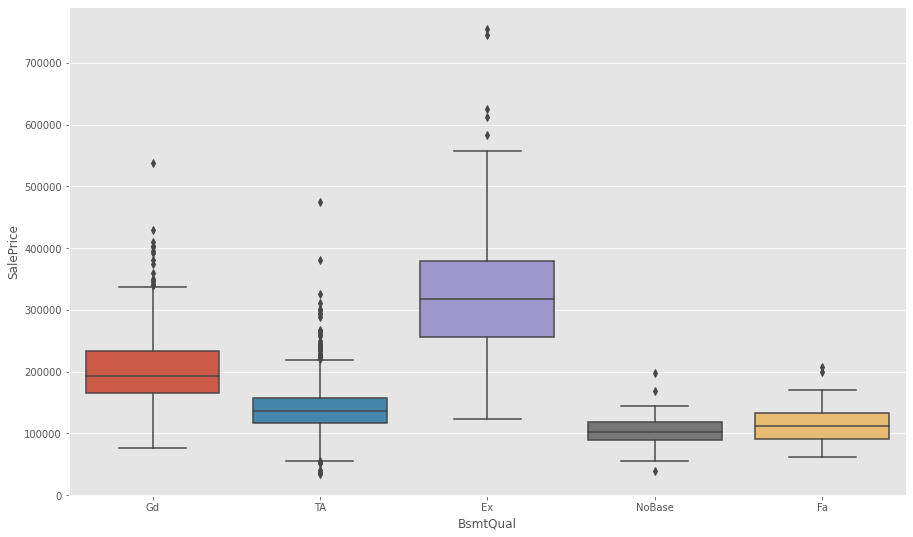

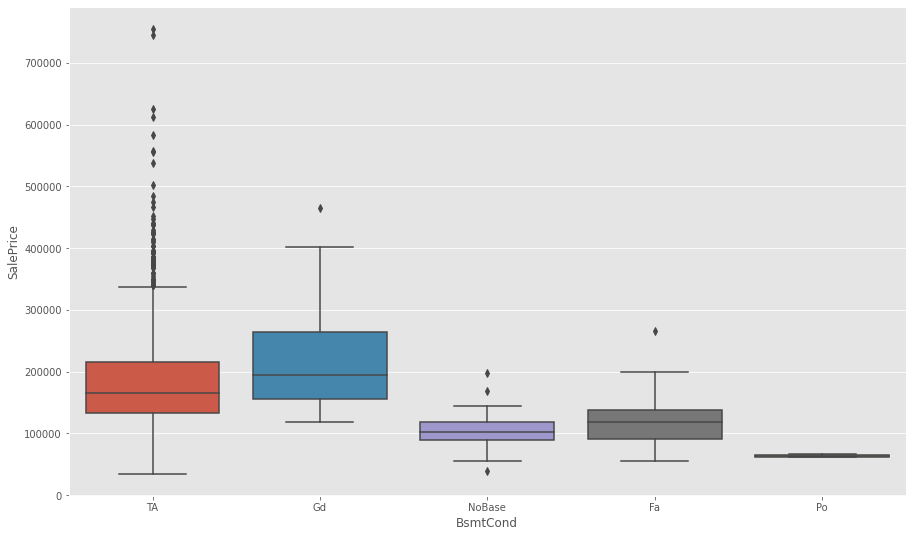

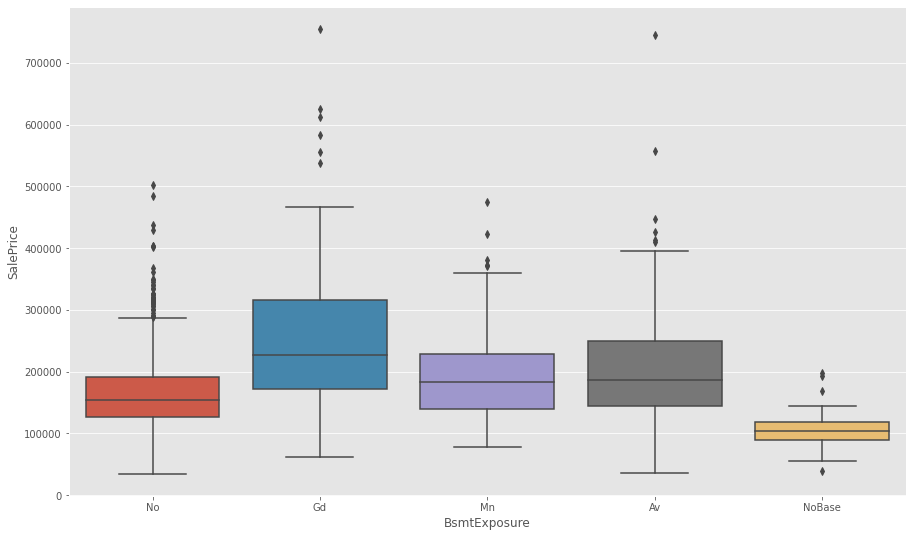

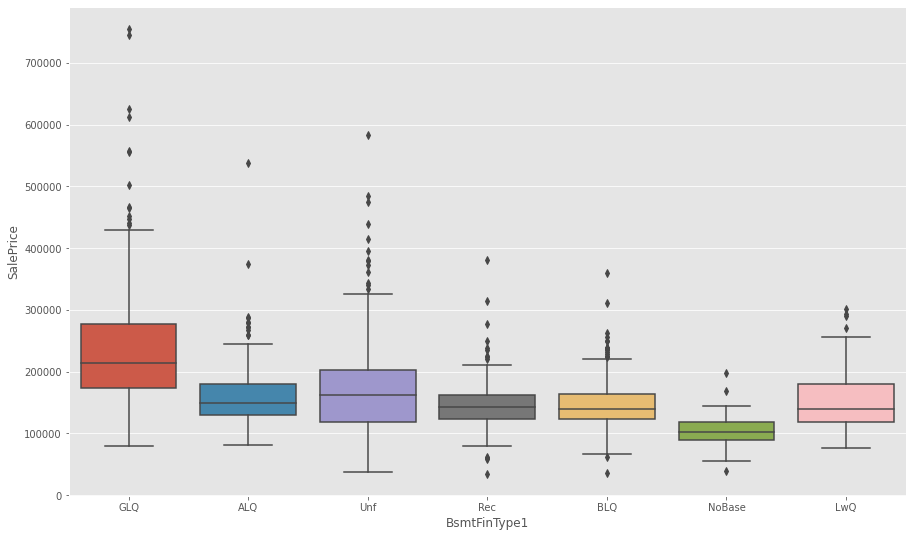

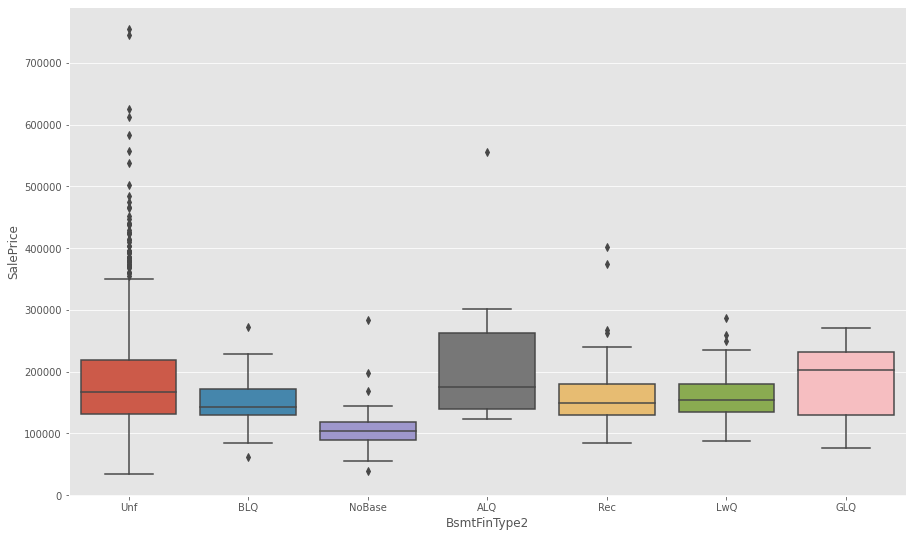

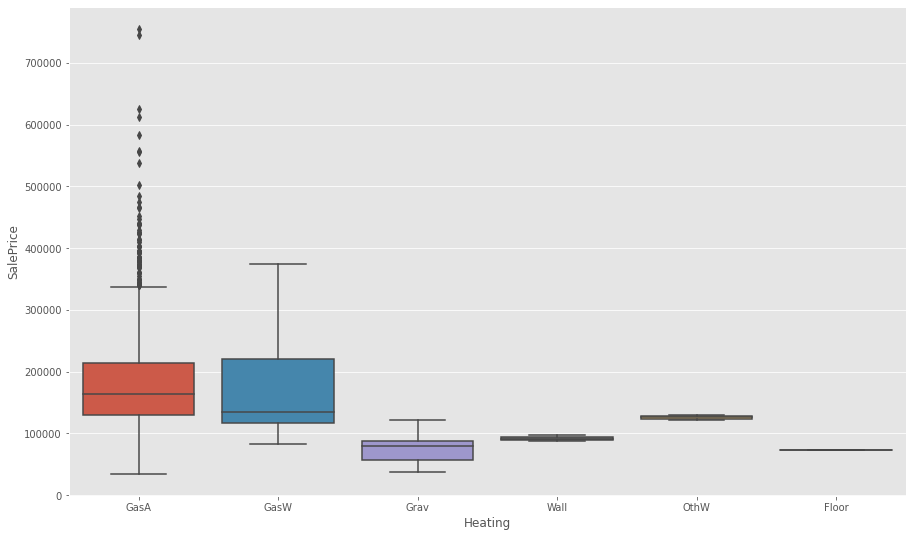

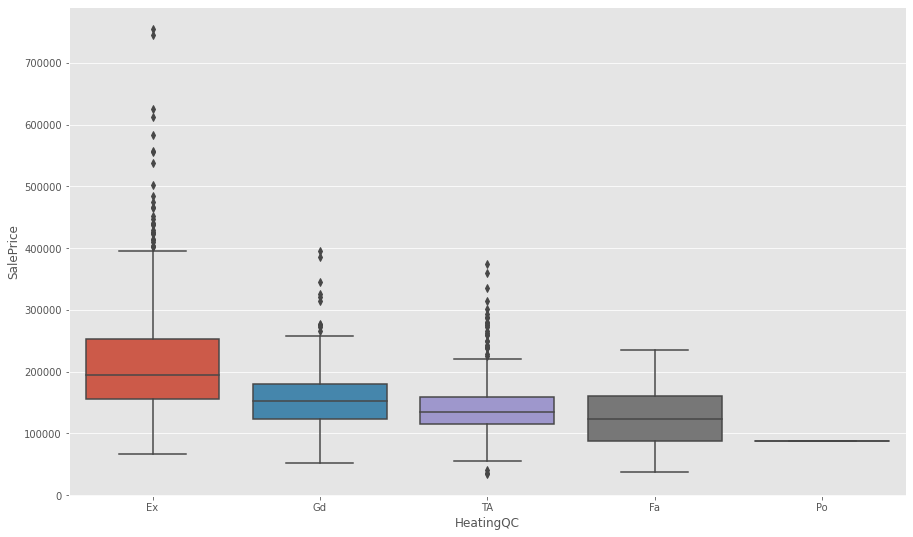

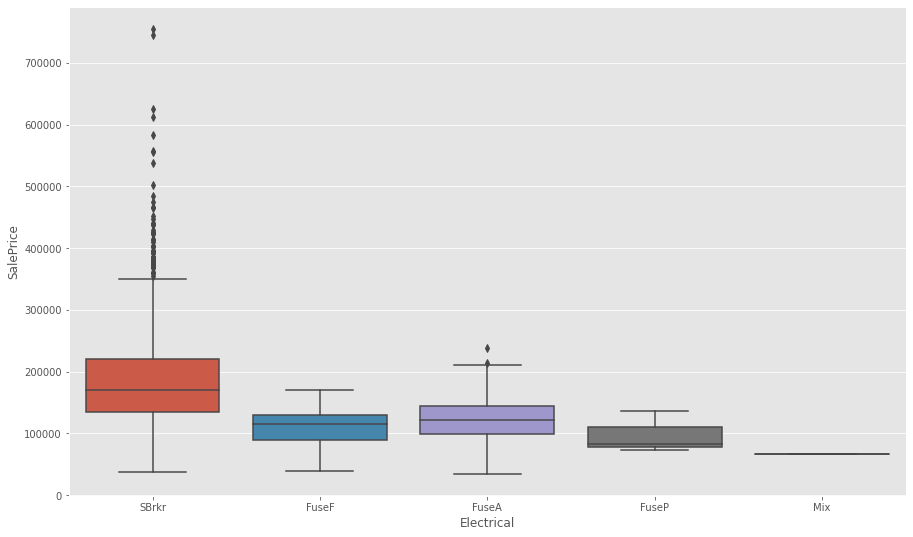

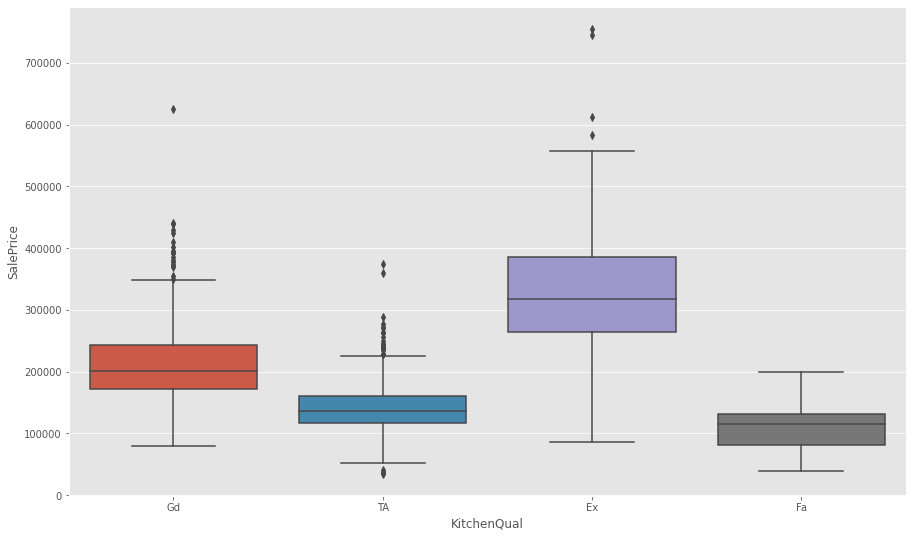

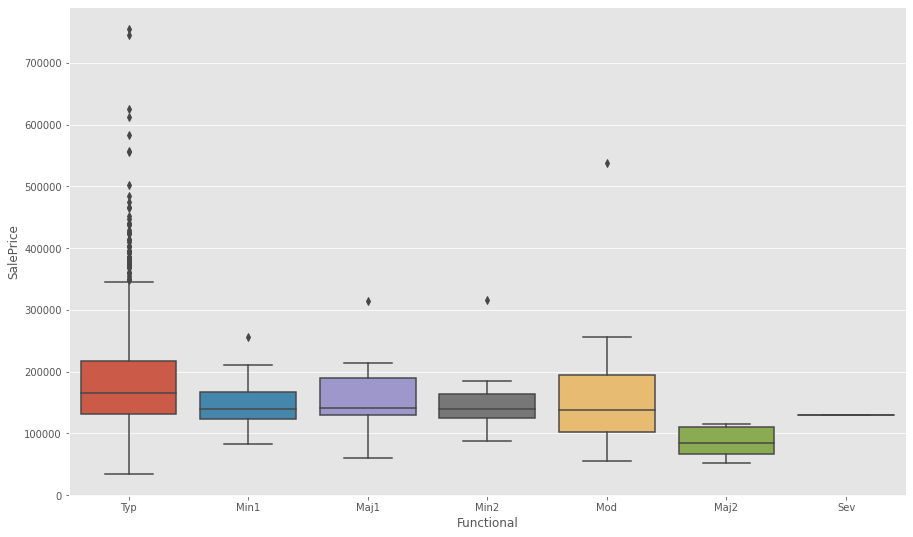

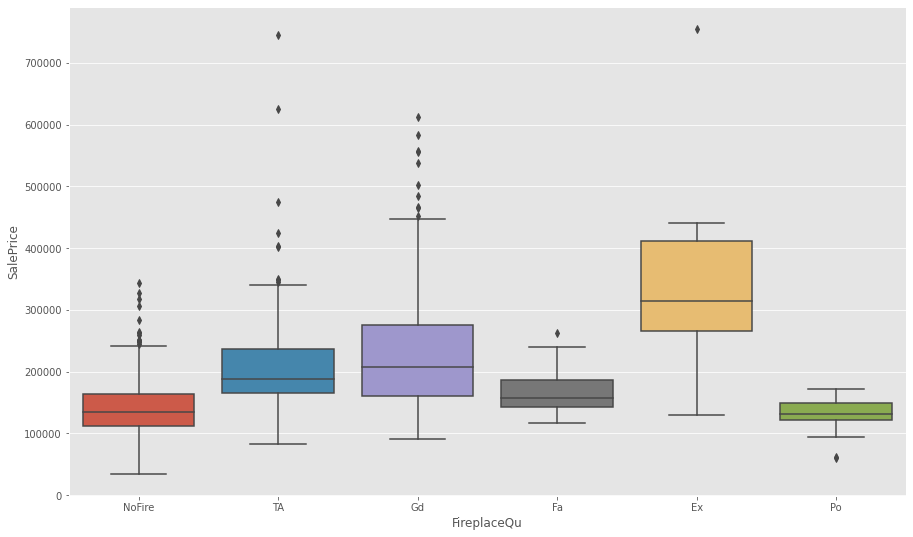

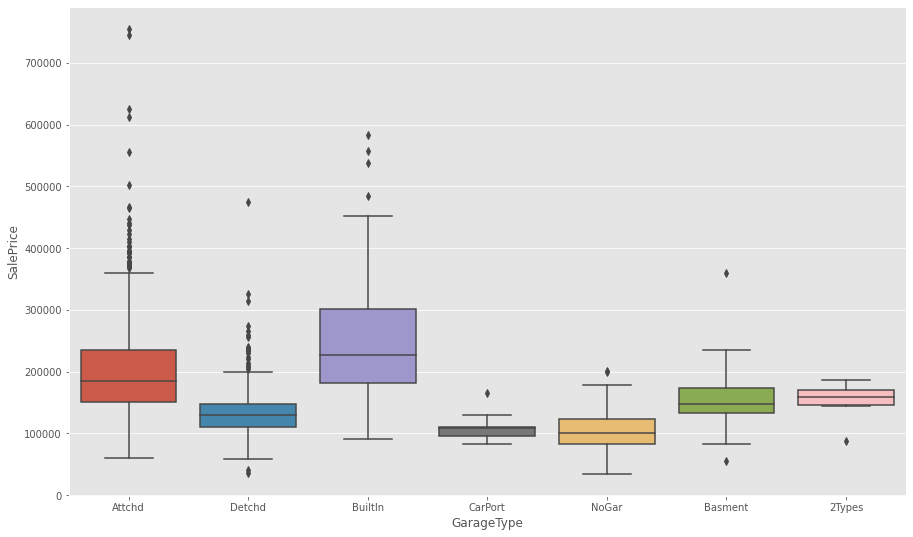

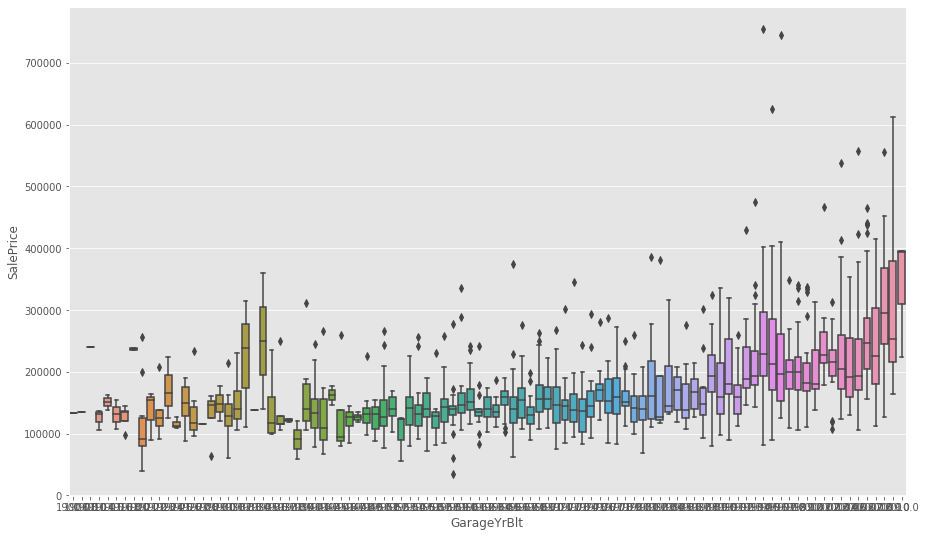

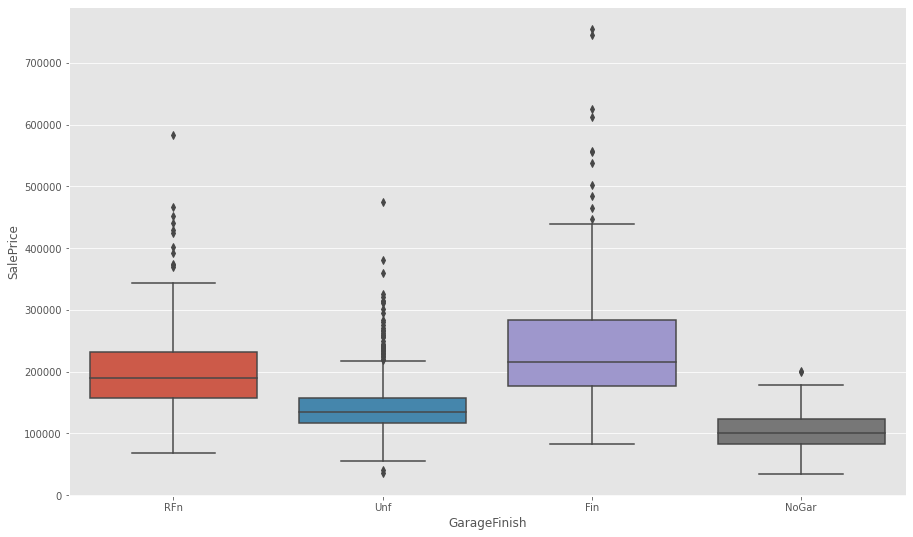

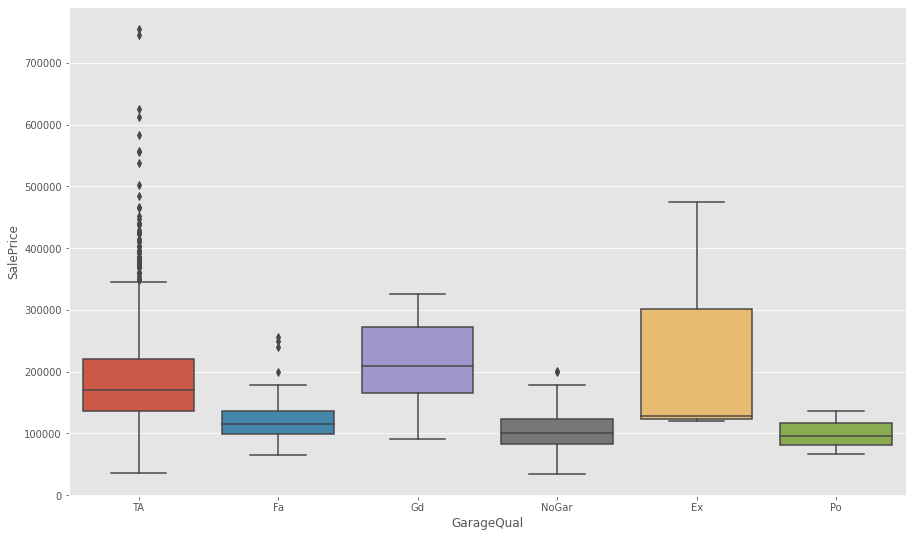

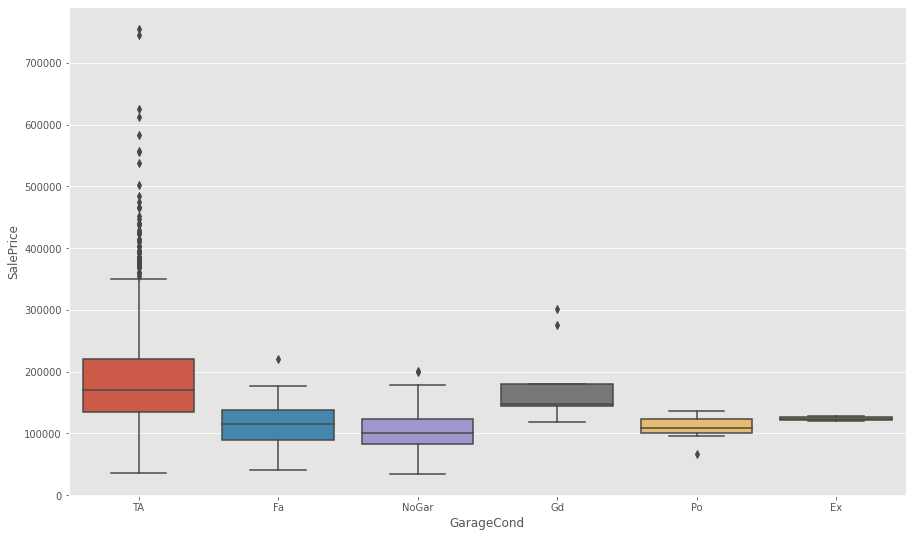

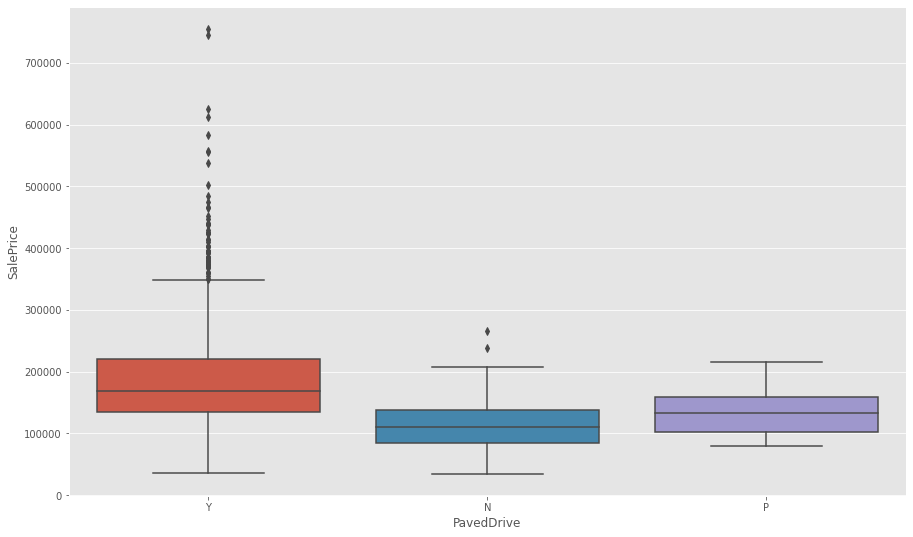

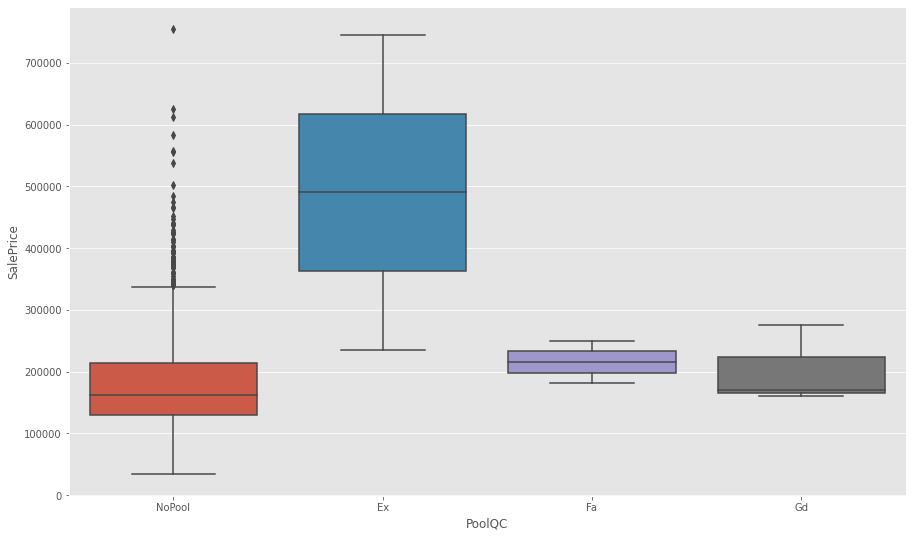

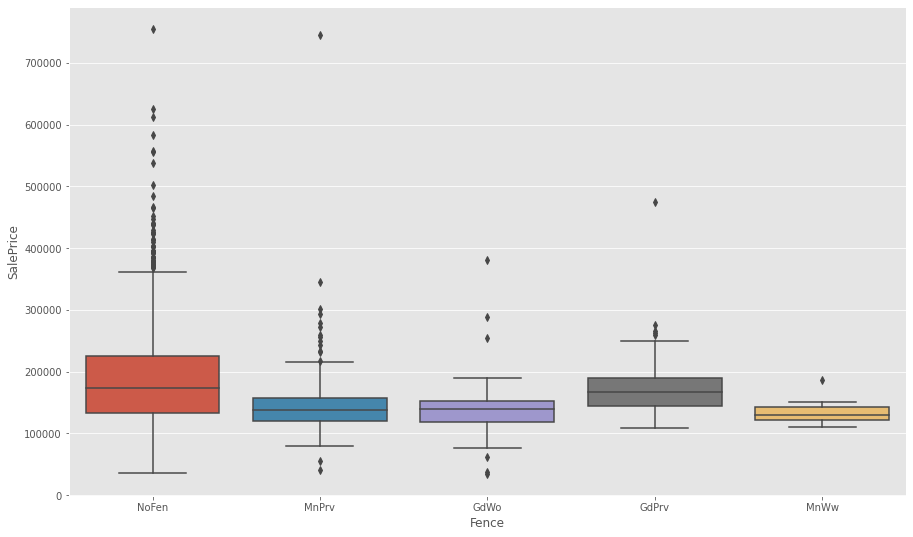

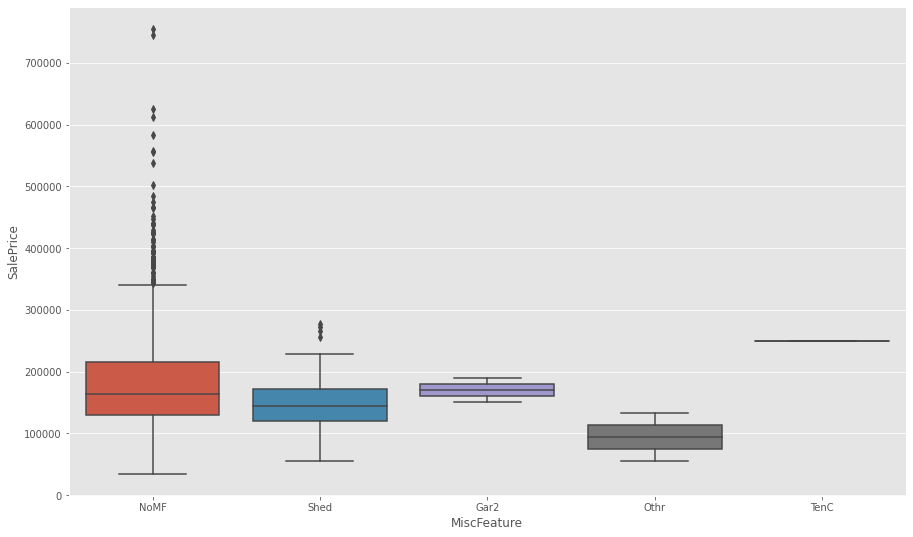

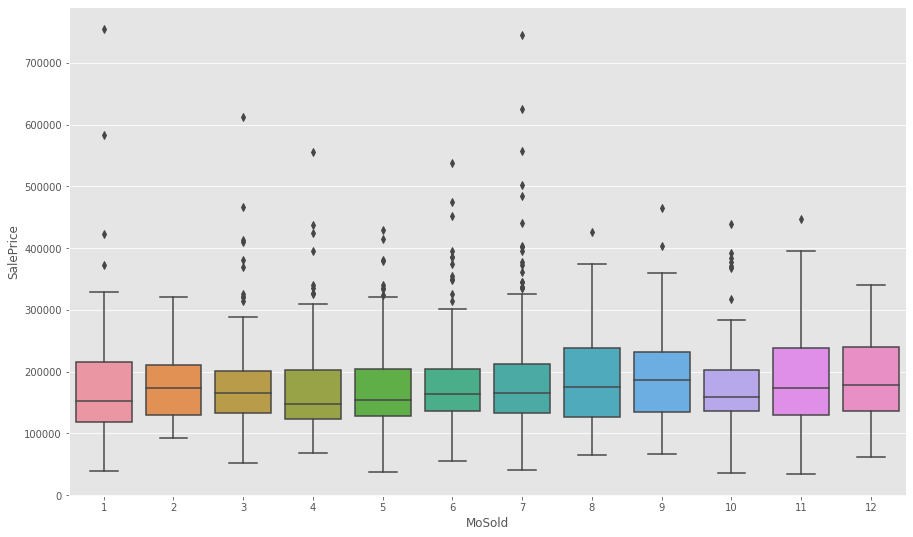

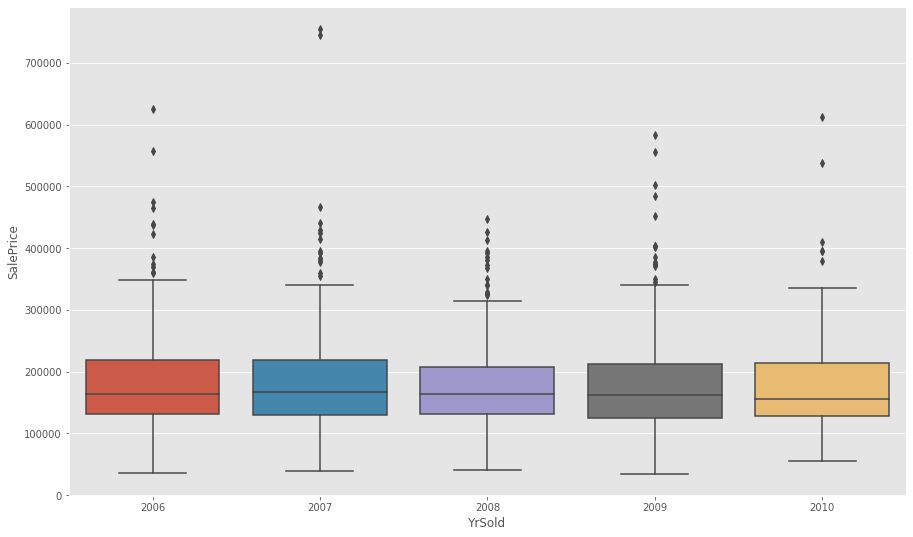

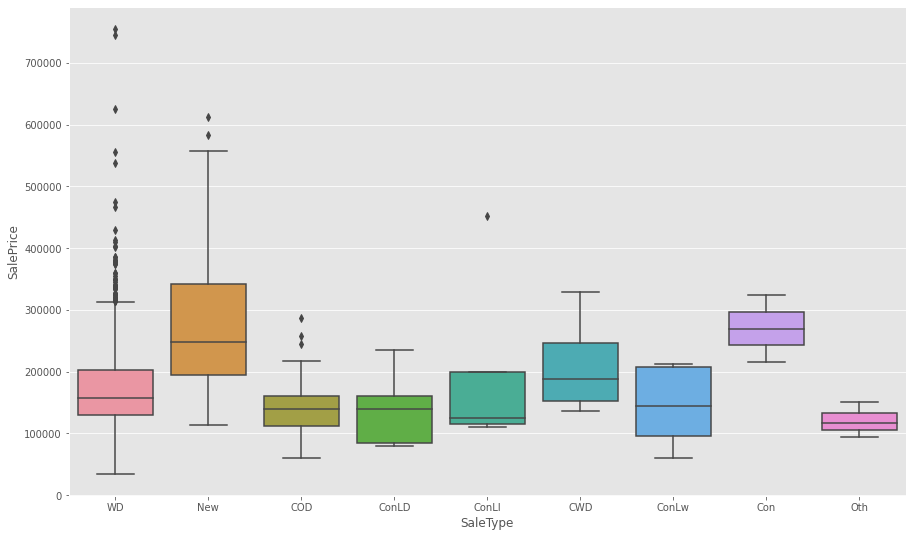

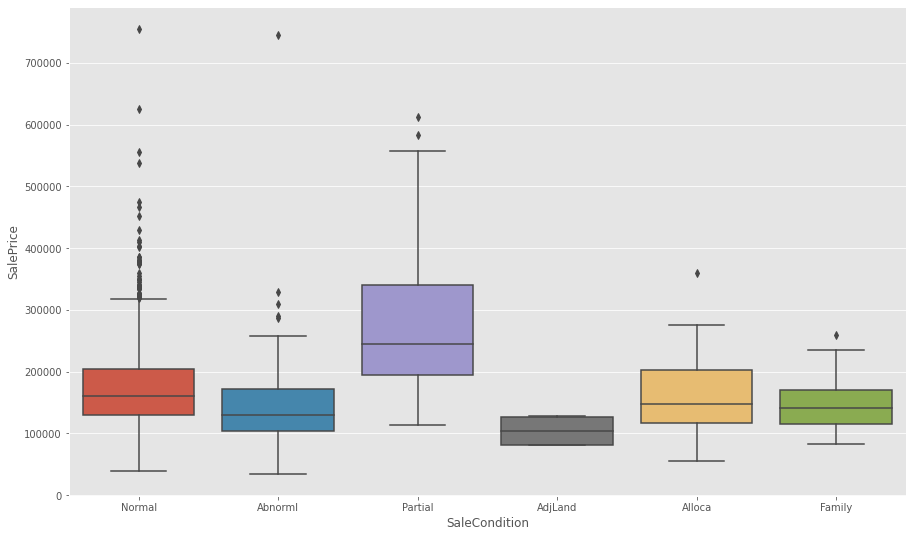

In [9]:
for variable in categorical_X.columns:
    if variable == 'Street' or variable == 'CentralAir':
        continue
    else:
        fig = plt.figure(figsize=(15, 9))
        sns.boxplot(y=y, x=categorical_X[variable])
        plt.show()
